In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The Data Science Process

### 1. Ask a Question
* What is your goal?
* What would you do if you had all data?
* What do you want to predict or estimate?
* What do you want to understand or gain insight? 

### 2. Collect Data
* What is the source of data?
* Are you missing any data?
* Which points of data are relevant?
* How can you best sample the data?  

### 3. Explore Data
* What are anomalies in your data?
* What are patterns in your data?
* What is considered normal for your data?
* What plots best represent your data?

### 4. Model Data
* What features are important to your data?
* Why are these feature important to your data?
* How can you best model your data?

### 5. Communicate & Visualize Results
* What did you learn?
* Do the results make sense?
* Do you need more data?'


#### Repeat Steps When Necessary

## 4. Model Data

There are many ways to model data. We won't go into a deep dive of machine learning but we will provide a simple introduction. 

Machine learning algorithms help build mathematical models in order to make predictions or deicision without being explicitly programmed to perform the task.

Types of machine learning tasks:
* supervised learning
* unsupervised learning
* semi-supervised learning
* active learning
* deep learning
* reinforcement learning

The difference between the main two (supervised and unsupervised), is unsupervised learning does not rely on initial label training data to build models, while suprvised learning required this training data. In the case of semi-supervised learning, the training data is missing some training labels.

## Exercise 5

Take a look at your dataset, should we perform unsupervised or supervised learning?

Now, we that we have choose a specific task. We must decide on the type of algorithm we want to use, in machine learning the typical choice are between classification and regression. Classification is the problem of identifying to which of a set of categories a new observation belongs. For example given an email, it will classify it as either spam or non-spam. Regression is a set of statistical processes for estimating the relationships among variables. For example, we could predict the value of a house based on number of bathrooms, number of square footage and etc.

## Exercise 6

Take another look at the dataset, should we use a classifcation or regression algorithm?

We will spend more time on machine learning later, but we will implement a well known algorithm to determine malicious websites.

In [2]:
df = pd.read_csv('data/updated_dataset.csv')

df = df.drop(columns=['URL', 'CHARSET', 'SERVER', 
                      'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
                     'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE',
                     'DNS_QUERY_TIMES'])

X = df.drop('Type', axis=1)
y = df.Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

print(accuracy)
print(cm)

0.9019607843137255
[[298  10]
 [ 25  24]]


## 5. Communicate & Visualize Results

We have successfully model the dataset. Now, we need to visualize and communicate the results.

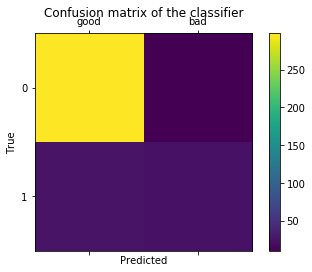

In [3]:
fig = plt.figure()
labels = ['good', 'bad']
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_xticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

References:
1. https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e
2. https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
3. https://github.com/ritikabhasker/Intro-to-EDA/blob/master/Intro_to_EDA.ipynb
4. https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
5. https://www.kdnuggets.com/2016/03/data-science-process.html